In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, roc_auc_score
import h2o
from h2o.automl import H2OAutoML

In [46]:
data = pd.read_csv('/Users/andrewcosta/Desktop/Autodidactism/Python/data science/Raw Data/companies-bankruptcy-forecast/bankruptcy_Train.csv')

In [47]:
data.shape

(10000, 65)

In [48]:
data.head()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
0,-0.031545,-0.091313,-0.040269,-0.013529,0.007406,-0.016047,-0.000264,0.641242,-0.748385,0.126789,...,0.014367,0.005457,-0.014143,-0.020924,0.068399,-0.214478,-0.013915,-0.173939,-0.046788,0
1,-0.231729,-0.049448,0.304381,-0.080975,0.007515,-0.016047,-0.034963,0.074710,0.469815,0.073759,...,0.008492,-0.008385,-0.008666,-0.023095,-0.033498,-0.205796,-0.015174,-0.073056,-0.027236,0
2,-0.058602,0.065060,-0.488404,-0.189489,0.006572,-0.016047,-0.004954,-0.456287,0.270351,-0.071287,...,0.010819,0.006779,-0.009437,-0.007919,-0.043455,0.019740,-0.011736,-0.291624,-0.033580,0
3,-0.069376,0.044641,-0.181684,-0.140032,0.007477,-0.010915,-0.005599,-0.462971,-0.286746,-0.085266,...,0.010683,0.005384,-0.010840,0.001381,-0.042828,-0.350519,0.002969,-0.554685,-0.046823,0
4,0.236424,-0.051912,0.678337,-0.014680,0.007879,-0.016047,0.057418,0.097183,0.423405,0.076880,...,0.010970,0.025295,-0.011056,-0.022535,-0.035892,-0.181557,-0.015623,-0.027841,-0.023694,0


In [49]:
data.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr56,Attr57,Attr58,Attr59,Attr60,Attr61,Attr62,Attr63,Attr64,class
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.007954,-0.007140,-0.003544,0.005005,-0.004687,0.001455,-0.006963,0.009053,0.006763,0.007456,...,0.009804,0.005208,-0.009751,-0.002655,0.004548,0.014331,-0.006864,0.020750,-0.003984,0.020300
std,1.396405,1.409440,1.015494,0.908020,1.394750,1.286713,1.412509,1.064426,1.171199,1.407349,...,0.017370,0.718682,0.026124,0.467139,1.252571,1.171160,0.277288,1.115182,0.930875,0.141032
min,-9.474787,-140.604555,-25.597146,-0.381641,-138.720013,-26.249562,-141.176615,-0.966015,-1.294340,-2.528495,...,-1.657288,-42.381245,-0.037484,-3.218490,-0.048598,-0.412525,-0.022204,-0.743297,-0.050969,0.000000
25%,-0.079776,-0.055604,-0.516971,-0.192306,0.006798,-0.016047,-0.008018,-0.445667,-0.388184,-0.068584,...,0.009315,0.003199,-0.010766,-0.022740,-0.043418,-0.221237,-0.016847,-0.371384,-0.041603,0.000000
50%,-0.019204,0.000246,0.003186,-0.117972,0.007302,-0.016047,0.004280,-0.260150,-0.307842,0.000253,...,0.009838,0.010013,-0.009924,-0.020438,-0.039928,-0.139653,-0.013821,-0.180311,-0.034319,0.000000
75%,0.081218,0.056957,0.585722,0.022705,0.007753,0.016026,0.024222,0.098874,0.156638,0.070036,...,0.010693,0.019900,-0.009416,-0.014401,-0.031820,-0.002210,-0.009476,0.133244,-0.020507,0.000000
max,137.557872,2.004925,3.324327,60.825460,11.556238,121.354736,0.623095,47.504463,62.936396,140.123299,...,0.036727,37.405312,2.551674,27.969785,117.341069,59.139158,23.970250,62.527240,90.774695,1.000000


In [50]:
data.isnull().values.any()

False

In [51]:
# bankruptcy is class in this dataset, so lets change
data.rename(columns={'class':'target'}, inplace=True)

In [52]:
# split features
cont_names = data.columns[:1]

output = data[data.columns[-1]]
features = data[data.columns[:(data.shape[1]-1)]]

In [53]:
output.value_counts()

0    9797
1     203
Name: target, dtype: int64

In [54]:
# predict with logistic regression and xgboost
X_train, X_test, y_train, y_test = train_test_split(features, output, test_size=0.2, random_state=42)
train = pd.concat([X_train, y_train], 1)
test = pd.concat([X_test, y_test], 1)

/Users/andrewcosta/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/andrewcosta/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarnin

[11:13:51] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


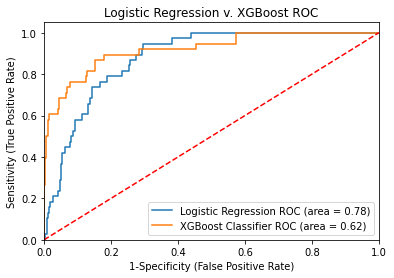

In [55]:
plt.figure()
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(class_weight='balanced'),
},
{
    'label': 'XGBoost Classifier',
    'model': XGBClassifier(max_depth=10, n_estimators=300),
}
]

# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
    
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    
# Calculate Area under the curve to display on the plot
    auc = roc_auc_score(y_test,model.predict(X_test))
    
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
    
#Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity (False Positive Rate)')
plt.ylabel('Sensitivity (True Positive Rate)')
plt.title('Logistic Regression v. XGBoost ROC')
plt.legend(loc="lower right")
plt.show()

In [56]:
# predict bankruptcies with h2o
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,12 mins 18 secs
H2O_cluster_timezone:,Europe/London
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.0.4
H2O_cluster_version_age:,1 month and 14 days
H2O_cluster_name:,H2O_from_python_andrewcosta_a6a88f
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.985 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [57]:
# Training phase set up
data = h2o.H2OFrame(train)

# Setting up features and output for h2o models
data['target'] = data['target'].asfactor()
y = "target"
cont_names = cont_names.tolist()
x = cont_names

# Setting up max time of model training
aml = H2OAutoML(max_runtime_secs= 3600, max_models=60, sort_metric='AUC')
aml.train(x = x, y = y, training_frame = data)

# Displaying best models built
lb = aml.leaderboard
lb.head(rows=lb.nrows)

Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%


model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
StackedEnsemble_BestOfFamily_AutoML_20210316_111434,0.69294,0.0956966,0.0434533,0.432767,0.141439,0.0200049
StackedEnsemble_AllModels_AutoML_20210316_111434,0.692502,0.0961752,0.0403415,0.403017,0.141627,0.0200581
XGBoost_grid__1_AutoML_20210316_111434_model_2,0.687161,0.0952812,0.0431844,0.408114,0.14132,0.0199714
XGBoost_grid__1_AutoML_20210316_111434_model_10,0.683983,0.0955136,0.042463,0.415737,0.141381,0.0199886
DeepLearning_grid__1_AutoML_20210316_111434_model_1,0.680413,0.0986926,0.0388468,0.435577,0.141709,0.0200813
XGBoost_grid__1_AutoML_20210316_111434_model_4,0.679909,0.0955868,0.040329,0.408818,0.141408,0.0199963
GLM_1_AutoML_20210316_111434,0.679749,0.0996697,0.0453947,0.418099,0.142319,0.0202546
XGBoost_grid__1_AutoML_20210316_111434_model_1,0.677374,0.0954845,0.0421391,0.407828,0.141467,0.020013
XGBoost_grid__1_AutoML_20210316_111434_model_6,0.675738,0.0967362,0.0413865,0.453372,0.141702,0.0200795
GBM_grid__1_AutoML_20210316_111434_model_6,0.675477,0.0969111,0.0404409,0.41421,0.14169,0.020076


In [58]:
# Creating Predictions of best model
hf = h2o.H2OFrame(test)
preds = aml.predict(hf)
preds = preds.as_data_frame()
preds['p_p0'] = np.exp(preds['p0'])
preds['p_p1'] = np.exp(preds['p1'])
preds['sm'] = preds['p_p1'] / (preds['p_p0'] + preds['p_p1'])

# ROC score of best model
roc_auc_score(y_test, preds['sm'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


0.6841837008423198